# Programas con Hilos
Computación Concurrente.
* Ortega Ibarra Jaime Jesús



# Productor/Consumidor
* 1 Productor
* 2 Consumidores

MUTEX

In [7]:
from threading import Thread, BoundedSemaphore
from queue import Queue
from random import randint

In [8]:
# Creamos 3 clases, para consumir, producir y La implementación de MUTEX, yo utilicé semáforos.
class M(BoundedSemaphore):
    def __init__(self):
        self.bloqueado = False
        super().__init__()
    def block(self):
        super().acquire()
        self.bloqueado = True
    def unblocked(self):
        super().release()
        self.bloqueado = False
class Productor(Thread):
    def __init__(self,buffer,mutex):
        super().__init__()
        self.buffer = buffer
        self.mutex = mutex
        self.despierto = False
    def produce(self):
        item = 1
        print("Panadero produce:" ,item, "Donas")
        return item
    def agregar(self,item):
        self.buffer.put(item)
        print("Panadero añadió" ,item, " Donas al Mostrador ")
    def run(self):
        while True:
            self.mutex.block()
            if not self.buffer.full():
                espacio = self.buffer.maxsize - self.buffer.qsize()
                if espacio ==0:
                    print("Panadero no tiene espacio para hacer mas donas")
                if espacio>0:
                    print("Panadero tiene espacio para hacer:",espacio,"donas")
                item = self.produce()
                self.agregar(item)
            self.mutex.unblocked()
class Consumidores(Thread):
    identificador = 1
    def __init__(self,buffer,mutex):
        super().__init__()
        self.buffer = buffer 
        self.mutex = mutex
        self.id = Consumidores.identificador
        Consumidores.identificador += 1        
    def obtener(self):
        item = self.buffer.get()
        print(" El Cliente:", self.id, "compró", item, "del Mostrador")
        return item
    def consume(self,item):
        print("El Cliente:", self.id, "Se comió",item,"Dona")
    def run(self):
        while True:
            self.mutex.block()
            if not self.buffer.empty():
                print("Cliente",self.id,"Hay",self.buffer.qsize(),"Donas por Comer")
                item = self.obtener() #Item que se obtuvo del bufffer
                self.consume(item)
            self.mutex.unblocked()
b = randint(5,10) #Definimos el tamaño de buffer con un valor random que podría ir de 5 a 10.
mutex = M() #Mutex es igual a la función M
buffer = Queue(b) #Buffer tendrá tamaño random de 5 a 10.

#Creación de los hijos, envían tamaño del buffer y Mutex, que redirecciona a la funcion M que contiene el Lock.
h1 = Productor(buffer,mutex)
h2 = Consumidores(buffer,mutex)
h3 = Consumidores(buffer,mutex)

h1.start()
h2.start()
h3.start()

h1.join()
h2.join()
h3.join()

Panadero tiene espacio para hacer: 5 donas
Panadero produce: 1 Donas
Panadero añadió 1  Donas al Mostrador 
Panadero tiene espacio para hacer: 4 donas
Panadero produce: 1 Donas
Panadero añadió 1  Donas al Mostrador 
Panadero tiene espacio para hacer: 3 donas
Panadero produce: 1 Donas
Panadero añadió 1  Donas al Mostrador 
Panadero tiene espacio para hacer: 2 donas
Panadero produce: 1 Donas
Panadero añadió 1  Donas al Mostrador 
Panadero tiene espacio para hacer: 1 donas
Panadero produce: 1 Donas
Panadero añadió 1  Donas al Mostrador 
Cliente 2 Hay 5 Donas por Comer
 El Cliente: 2 compró 1 del Mostrador
El Cliente: 2 Se comió 1 Dona
Cliente 2 Hay 4 Donas por Comer
 El Cliente: 2 compró 1 del Mostrador
El Cliente: 2 Se comió 1 Dona
Cliente 2 Hay 3 Donas por Comer
 El Cliente: 2 compró 1 del Mostrador
El Cliente: 2 Se comió 1 Dona
Cliente 2 Hay 2 Donas por Comer
 El Cliente: 2 compró 1 del Mostrador
El Cliente: 2 Se comió 1 Dona
Cliente 2 Hay 1 Donas por Comer
 El Cliente: 2 compró 1 del 

KeyboardInterrupt: 


Panadero produce: 1 Donas
Panadero añadió 1  Donas al Mostrador 
Panadero tiene espacio para hacer: 3 donas
Panadero produce: 1 Donas
Panadero añadió 1  Donas al Mostrador 
Panadero tiene espacio para hacer: 2 donas
Panadero produce: 1 Donas
Panadero añadió 1  Donas al Mostrador 
Panadero tiene espacio para hacer: 1 donas
Panadero produce: 1 Donas
Panadero añadió 1  Donas al Mostrador 
Cliente 2 Hay 5 Donas por Comer
 El Cliente: 2 compró 1 del Mostrador
El Cliente: 2 Se comió 1 Dona
Cliente 2 Hay 4 Donas por Comer
 El Cliente: 2 compró 1 del Mostrador
El Cliente: 2 Se comió 1 Dona
Cliente 2 Hay 3 Donas por Comer
 El Cliente: 2 compró 1 del Mostrador
El Cliente: 2 Se comió 1 Dona
Cliente 2 Hay 2 Donas por Comer
 El Cliente: 2 compró 1 del Mostrador
El Cliente: 2 Se comió 1 Dona
Cliente 2 Hay 1 Donas por Comer
 El Cliente: 2 compró 1 del Mostrador
El Cliente: 2 Se comió 1 Dona


# 2 Threads
* 1 Thread: g(x) = $3x^2+2x-1$
* 2 Thread: f(g(x)) = $sin(g(x))+cos(g(x))$

In [1]:
import threading
import math
import matplotlib.pyplot as plt

In [2]:
def fun(): #Función para el proceso 1, va a calcular G(X)
    global x
    i = -100.25
    while i <100: #Con este while daremos todos los valores de x desde -100 hasta 100.
        i+=0.25
        L = ((i*3)*(i*3)) + 2*i - 1
        print(" g(x) para x = ",i,"es : ",L)
        x.append(L) #Lista con todos los valores
    
def func(x):
    global y
    for i in range(len(x)):
        x2 = math.sin(x[i])+math.cos(x[i])
        y.append(x2)
        print(" f(g(x)) para g(x) = ",x[i]," es : ",x2)
x = []
y = []
thread = threading.Thread(target=fun)
thread2 = threading.Thread(target=func, args=(x,))
thread.start()
thread.join()
thread2.start()
thread2.join()

 g(x) para x =  -100.0 es :  89799.0
 g(x) para x =  -99.75 es :  89350.0625
 g(x) para x =  -99.5 es :  88902.25
 g(x) para x =  -99.25 es :  88455.5625
 g(x) para x =  -99.0 es :  88010.0
 g(x) para x =  -98.75 es :  87565.5625
 g(x) para x =  -98.5 es :  87122.25
 g(x) para x =  -98.25 es :  86680.0625
 g(x) para x =  -98.0 es :  86239.0
 g(x) para x =  -97.75 es :  85799.0625
 g(x) para x =  -97.5 es :  85360.25
 g(x) para x =  -97.25 es :  84922.5625
 g(x) para x =  -97.0 es :  84486.0
 g(x) para x =  -96.75 es :  84050.5625
 g(x) para x =  -96.5 es :  83616.25
 g(x) para x =  -96.25 es :  83183.0625
 g(x) para x =  -96.0 es :  82751.0
 g(x) para x =  -95.75 es :  82320.0625
 g(x) para x =  -95.5 es :  81890.25
 g(x) para x =  -95.25 es :  81461.5625
 g(x) para x =  -95.0 es :  81034.0
 g(x) para x =  -94.75 es :  80607.5625
 g(x) para x =  -94.5 es :  80182.25
 g(x) para x =  -94.25 es :  79758.0625
 g(x) para x =  -94.0 es :  79335.0
 g(x) para x =  -93.75 es :  78913.0625
 g(x)

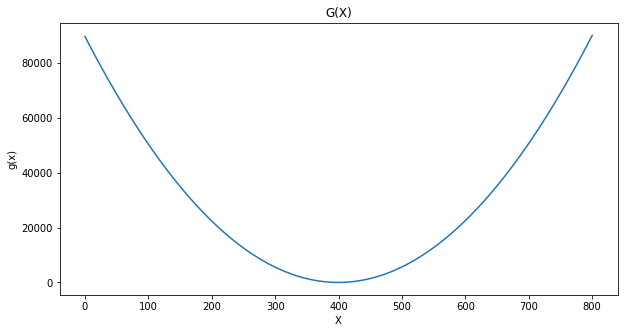

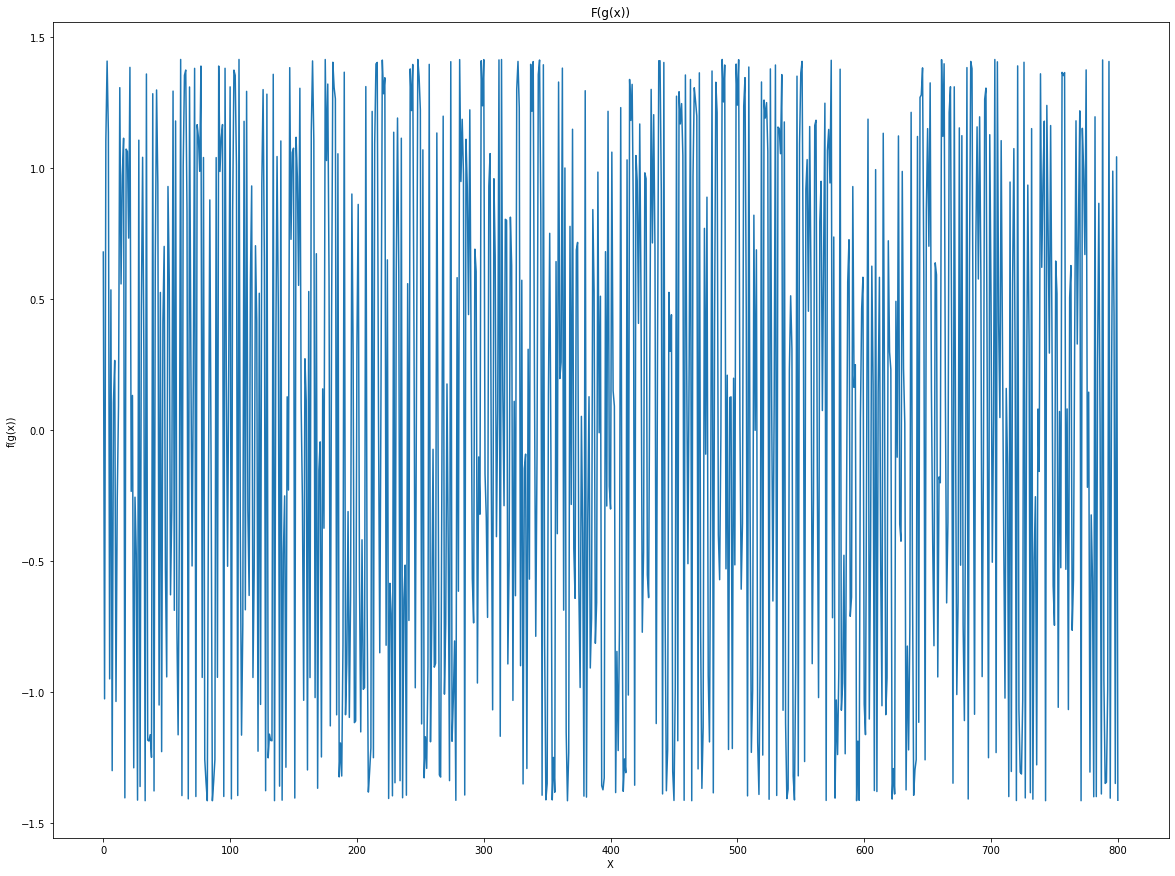

In [3]:
#Graficamos para ver comportamiento y verificar que sea correcto el cálculo de las funciones.
#Gráfica g(x)
plt.figure(figsize=(10,5))
plt.title("G(X)")
plt.xlabel("X")
plt.ylabel("g(x)")
plt.plot(x)
#Gráfica f(g(x))
plt.figure(figsize=(20,15))
plt.title("F(g(x))")
plt.xlabel("X")
plt.ylabel("f(g(x))")
plt.plot(y)

# Máquina de chicles
Simular dando tiempo de sincronización

In [4]:
import threading
from random import randint
from time import sleep

In [5]:
def proceso1(p, c):
    global i
    for x in range(1,p+1):
        print("Proceso 1 recibe: 1 polvo")
        print("Recibidos:", x)
        sleep(.5)
    for y in range(1,c+1):
        print("Proceso 1 recibe: 1 chicles")
        print("Recibidos:", y)
        sleep(.5)
    print("Tenemos: ",c,"Chicles y" ,p,"Polvos")
    sleep(2)
    b = p-c
    a = c-p
    if b == 0:
        for l in range(1,p+1):
            print("Cubriendo con polvo el chicle:",l)
            sleep(.5)
        print("Tenemos",p, "Bolichicles, sobraron",b,"ingredientes")
        i = p
    if p<c:
        for l in range(1,p+1):
            print("Cubriendo con polvo el chicle:",l)
            sleep(.5)
        print("Tenemos",p, "Bolichicles, sobraron",a,"chicles")
        i = p
    if p>c:
        for l in range(1,c+1):
            print("Cubriendo con polvo el chicle:",l)
            sleep(.5)
        print("Tenemos",c, "Bolichicles, sobraron",b,"polvos")
        i = c
def proceso2():
    for y in range(1,i+1):
        print("Proceso 2 Recibe 1 bolichicle.")
        sleep(0.5)
        print(y, "Bolichicles recibidos.")
    sleep(2)
    print("Se han envuelto",i,"bolichicles")

def proceso3():
    bolsas = int(i/10)
    emp = bolsas*10
    rest = i - emp
    for x in range(1,i+1):
        print("Proceso 3 Recibe 1 bolichicle envuelto")
        print(x, "bolichicles envueltos recibidos.")
    sleep(1.5)
    print("Embolsando")
    sleep(2)
    print("Tenemos:",bolsas,"Bolsas de 10 Bolichicles y se guardan",rest,"bolichicles")

chicles = 0
polvo = 0
polvo = randint(10,30) 
chicles = randint(10,30)
 
p1 = threading.Thread(target=proceso1, args=(polvo,chicles))
p2 = threading.Thread(target=proceso2)
p3 = threading.Thread(target=proceso3)
p1.start()
p1.join()
p2.start()
p2.join()
p3.start()
p3.join()

Proceso 1 recibe: 1 polvo
Recibidos: 1
Proceso 1 recibe: 1 polvo
Recibidos: 2
Proceso 1 recibe: 1 polvo
Recibidos: 3
Proceso 1 recibe: 1 polvo
Recibidos: 4
Proceso 1 recibe: 1 polvo
Recibidos: 5
Proceso 1 recibe: 1 polvo
Recibidos: 6
Proceso 1 recibe: 1 polvo
Recibidos: 7
Proceso 1 recibe: 1 polvo
Recibidos: 8
Proceso 1 recibe: 1 polvo
Recibidos: 9
Proceso 1 recibe: 1 polvo
Recibidos: 10
Proceso 1 recibe: 1 polvo
Recibidos: 11
Proceso 1 recibe: 1 polvo
Recibidos: 12
Proceso 1 recibe: 1 polvo
Recibidos: 13
Proceso 1 recibe: 1 polvo
Recibidos: 14
Proceso 1 recibe: 1 polvo
Recibidos: 15
Proceso 1 recibe: 1 polvo
Recibidos: 16
Proceso 1 recibe: 1 polvo
Recibidos: 17
Proceso 1 recibe: 1 polvo
Recibidos: 18
Proceso 1 recibe: 1 polvo
Recibidos: 19
Proceso 1 recibe: 1 polvo
Recibidos: 20
Proceso 1 recibe: 1 chicles
Recibidos: 1
Proceso 1 recibe: 1 chicles
Recibidos: 2
Proceso 1 recibe: 1 chicles
Recibidos: 3
Proceso 1 recibe: 1 chicles
Recibidos: 4
Proceso 1 recibe: 1 chicles
Recibidos: 5
Proc